<a href="https://colab.research.google.com/github/gadilshina-ve/SoftwareTools_DA/blob/main/PW_3/PW_3_Gadilshina_Valentina_Evgenevna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random

In [37]:
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds()))
    )

# **1. Создание projects_completion.json:**




In [3]:
partners = [
    'Accenture',
    'Deloitte',
    'PwC',
    'KPMG',
    'Ernst & Young',
    'IBM',
    'Salesforce',
    'Microsoft',
    'Oracle',
    'Cisco'
]

In [39]:
projects_json = []
for i in range(100):
    project = {
        'partner': random.choice(partners),
        'project': f'Project_{i}',
        'completed_work %': round(random.uniform(0, 101)),
        'contract_end_date': random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')
    }
    projects_json.append(project)

In [40]:
with open('projects_completion.json', 'w', encoding='utf-8') as f:
    json.dump(projects_json, f, ensure_ascii=False, indent=4)

# **2. Создание partners_contracts.csv:**


In [42]:
contracts_2022 = []
for _ in range(10000):
    contract = {
        'partner': random.choice(partners),
        'contract_amount': round(random.uniform(100000, 10000000), 2),
        'contract_date': random_date(datetime(2022, 1, 1), datetime(2022, 12, 31)).strftime('%Y-%m-%d')
    }
    contracts_2022.append(contract)

In [43]:
df_2022 = pd.DataFrame(contracts_2022)
df_2022.to_csv('partners_contracts.csv', index=False)

# **3. Создание projects_budget.xlsx:**


In [44]:
projects_2023 = []
for _ in range(12000):
    project = {
        'partner': random.choice(partners),
        'project': f'Project_{random.randint(1, 100)}',
        'budget': round(random.uniform(50000, 5000000), 2),
        'project_end_date': random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')
    }
    projects_2023.append(project)

In [45]:
df_2023 = pd.DataFrame(projects_2023)
df_2023.to_excel('projects_budget.xlsx', index=False)

# **Ход работы:**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df_partners_contracts = pd.read_csv('partners_contracts.csv')
print(df_partners_contracts.head())

     partner  contract_amount contract_date
0        PwC       4604213.07    2022-04-11
1  Accenture       7008908.66    2022-03-18
2  Microsoft       1901145.67    2022-02-12
3        PwC       3837625.18    2022-05-19
4        IBM       3625147.35    2022-06-09


In [48]:
df_projects_budget = pd.read_excel('projects_budget.xlsx')
print(df_projects_budget.head())

         partner     project      budget project_end_date
0      Accenture  Project_72  2934127.65       2023-10-17
1      Accenture  Project_52  3708420.35       2023-08-18
2         Oracle  Project_64  1768899.16       2023-06-25
3      Microsoft  Project_61  1813402.54       2023-10-20
4  Ernst & Young  Project_10  2813562.59       2023-12-03


In [49]:
df_projects = pd.read_json('projects_completion.json')
print(df_projects.head())

     partner    project  completed_work % contract_end_date
0   Deloitte  Project_0                86        2023-09-26
1  Microsoft  Project_1                81        2023-06-26
2   Deloitte  Project_2                77        2023-08-31
3        IBM  Project_3                97        2023-08-12
4        IBM  Project_4                43        2023-02-17


In [50]:
print(df_partners_contracts.isnull().sum())
print(df_projects_budget.isnull().sum())
print(df_projects.isnull().sum())

partner            0
contract_amount    0
contract_date      0
dtype: int64
partner             0
project             0
budget              0
project_end_date    0
dtype: int64
partner              0
project              0
completed_work %     0
contract_end_date    0
dtype: int64


In [51]:
df_partners_contracts.columns = df_partners_contracts.columns.str.lower()
df_projects_budget.columns = df_projects_budget.columns.str.lower()
df_projects.columns = df_projects.columns.str.lower()


In [52]:
df_merged = pd.merge(df_partners_contracts, df_projects, on='partner', how='outer')
df_merged

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date
0,Accenture,7008908.66,2022-03-18,Project_20,85,2023-07-30
1,Accenture,7008908.66,2022-03-18,Project_55,72,2023-11-17
2,Accenture,7008908.66,2022-03-18,Project_58,69,2023-09-02
3,Accenture,7008908.66,2022-03-18,Project_62,8,2023-10-18
4,Accenture,7008908.66,2022-03-18,Project_64,54,2023-06-08
...,...,...,...,...,...,...
100050,Salesforce,1926021.67,2022-10-26,Project_56,47,2023-07-23
100051,Salesforce,1926021.67,2022-10-26,Project_78,14,2023-09-27
100052,Salesforce,1926021.67,2022-10-26,Project_83,27,2023-09-05
100053,Salesforce,1926021.67,2022-10-26,Project_87,47,2023-01-27


In [53]:
print(df_merged.duplicated(subset=['partner', 'project']).sum())

99955


In [54]:
df_concat = df_merged.drop_duplicates(subset=['partner', 'project'])
df_concat

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date
0,Accenture,7008908.66,2022-03-18,Project_20,85,2023-07-30
1,Accenture,7008908.66,2022-03-18,Project_55,72,2023-11-17
2,Accenture,7008908.66,2022-03-18,Project_58,69,2023-09-02
3,Accenture,7008908.66,2022-03-18,Project_62,8,2023-10-18
4,Accenture,7008908.66,2022-03-18,Project_64,54,2023-06-08
...,...,...,...,...,...,...
90564,Salesforce,2327179.18,2022-10-14,Project_56,47,2023-07-23
90565,Salesforce,2327179.18,2022-10-14,Project_78,14,2023-09-27
90566,Salesforce,2327179.18,2022-10-14,Project_83,27,2023-09-05
90567,Salesforce,2327179.18,2022-10-14,Project_87,47,2023-01-27


In [55]:
df_final = pd.merge(df_concat, df_projects_budget, on=['partner', 'project'], how='outer')
df_final

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date
0,Accenture,NaN,NaN,Project_1,NaN,NaN,4085767.63,2023-01-03
1,Accenture,NaN,NaN,Project_1,NaN,NaN,1729201.34,2023-07-02
2,Accenture,NaN,NaN,Project_1,NaN,NaN,1371024.76,2023-05-01
3,Accenture,NaN,NaN,Project_1,NaN,NaN,743709.82,2023-11-08
4,Accenture,NaN,NaN,Project_1,NaN,NaN,2815496.33,2023-05-21
...,...,...,...,...,...,...,...,...
11996,Salesforce,NaN,NaN,Project_99,NaN,NaN,3976853.85,2023-04-14
11997,Salesforce,NaN,NaN,Project_99,NaN,NaN,791352.77,2023-07-13
11998,Salesforce,NaN,NaN,Project_99,NaN,NaN,1327252.02,2023-10-26
11999,Salesforce,NaN,NaN,Project_99,NaN,NaN,2795111.27,2023-04-04


In [56]:
print(df_final.duplicated(subset=['partner', 'project']).sum())

11000


In [57]:
df_final = df_final.drop_duplicates(subset=['partner', 'project'])
df_final

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date
0,Accenture,NaN,NaN,Project_1,NaN,NaN,4085767.63,2023-01-03
11,Accenture,NaN,NaN,Project_10,NaN,NaN,635429.12,2023-08-16
24,Accenture,NaN,NaN,Project_100,NaN,NaN,3249276.30,2023-02-23
34,Accenture,NaN,NaN,Project_11,NaN,NaN,4012583.72,2023-11-22
48,Accenture,NaN,NaN,Project_12,NaN,NaN,2054044.14,2023-08-29
...,...,...,...,...,...,...,...,...
11943,Salesforce,NaN,NaN,Project_95,NaN,NaN,2886066.31,2023-10-08
11960,Salesforce,NaN,NaN,Project_96,NaN,NaN,4906826.02,2023-10-31
11971,Salesforce,NaN,NaN,Project_97,NaN,NaN,1946210.03,2023-10-04
11982,Salesforce,NaN,NaN,Project_98,NaN,NaN,3774666.10,2023-12-03


In [58]:
print(df_final.isnull().sum())

partner                0
contract_amount      901
contract_date        901
project                0
completed_work %     901
contract_end_date    901
budget                 1
project_end_date       1
dtype: int64


In [59]:
df_final_cleaned = df_final.dropna()
print(df_final_cleaned.isnull().sum())

partner              0
contract_amount      0
contract_date        0
project              0
completed_work %     0
contract_end_date    0
budget               0
project_end_date     0
dtype: int64


In [60]:
df_final_cleaned

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date
147,Accenture,7008908.66,2022-03-18,Project_20,85.0,2023-07-30,1246281.36,2023-12-28
612,Accenture,7008908.66,2022-03-18,Project_55,72.0,2023-11-17,3985223.28,2023-05-08
642,Accenture,7008908.66,2022-03-18,Project_58,69.0,2023-09-02,4264297.07,2023-10-01
707,Accenture,7008908.66,2022-03-18,Project_62,8.0,2023-10-18,831611.79,2023-04-19
727,Accenture,7008908.66,2022-03-18,Project_64,54.0,2023-06-08,3757296.65,2023-03-19
...,...,...,...,...,...,...,...,...
11394,Salesforce,2327179.18,2022-10-14,Project_56,47.0,2023-07-23,4704876.11,2023-12-30
11689,Salesforce,2327179.18,2022-10-14,Project_78,14.0,2023-09-27,406375.49,2023-06-16
11771,Salesforce,2327179.18,2022-10-14,Project_83,27.0,2023-09-05,2076233.36,2023-05-27
11829,Salesforce,2327179.18,2022-10-14,Project_87,47.0,2023-01-27,432125.77,2023-09-16


In [63]:
duplicates = df_final_cleaned.duplicated()
print(duplicates.sum())

0


In [64]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 147 to 11921
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            99 non-null     object 
 1   contract_amount    99 non-null     float64
 2   contract_date      99 non-null     object 
 3   project            99 non-null     object 
 4   completed_work %   99 non-null     float64
 5   contract_end_date  99 non-null     object 
 6   budget             99 non-null     float64
 7   project_end_date   99 non-null     object 
dtypes: float64(3), object(5)
memory usage: 9.0+ KB


In [66]:
df_aggregated = df_final_cleaned.groupby('partner').agg(
    average_contract_amount=('contract_amount', 'mean'),
    average_completed_work=('completed_work %', 'mean'),
    average_budget=('budget', 'mean'),
    total_contract_amount=('contract_amount', 'sum'),
    total_projects=('project', 'count')
).reset_index()

df_aggregated

,partner,average_contract_amount,average_completed_work,average_budget,total_contract_amount,total_projects
0,Accenture,7008908.66,62.571429,3.180162e+06,49062360.62,7
1,Cisco,8101604.37,50.000000,2.974950e+06,40508021.85,5
2,Deloitte,2256515.63,44.333333,2.512714e+06,33847734.45,15
3,Ernst & Young,870819.60,63.333333,2.236042e+06,7837376.40,9
4,IBM,3625147.35,48.071429,3.002915e+06,50752062.90,14
5,KPMG,1582380.99,50.700000,2.722776e+06,15823809.90,10
6,Microsoft,1901145.67,47.090909,2.855584e+06,20912602.37,11
7,Oracle,2221039.13,56.666667,2.580891e+06,26652469.56,12
8,PwC,4604213.07,53.857143,1.825795e+06,32229491.49,7
9,Salesforce,2327179.18,46.222222,2.097635e+06,20944612.62,9


In [67]:
df_final_cleaned.loc[:, 'revenue'] = (df_final_cleaned['contract_amount'] - df_final_cleaned['budget']) * 0.8
df_final_cleaned

<ipython-input-67-982766901480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned.loc[:, 'revenue'] = (df_final_cleaned['contract_amount'] - df_final_cleaned['budget']) * 0.8


,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date,revenue
147,Accenture,7008908.66,2022-03-18,Project_20,85.0,2023-07-30,1246281.36,2023-12-28,4610101.840
612,Accenture,7008908.66,2022-03-18,Project_55,72.0,2023-11-17,3985223.28,2023-05-08,2418948.304
642,Accenture,7008908.66,2022-03-18,Project_58,69.0,2023-09-02,4264297.07,2023-10-01,2195689.272
707,Accenture,7008908.66,2022-03-18,Project_62,8.0,2023-10-18,831611.79,2023-04-19,4941837.496
727,Accenture,7008908.66,2022-03-18,Project_64,54.0,2023-06-08,3757296.65,2023-03-19,2601289.608
...,...,...,...,...,...,...,...,...,...
11394,Salesforce,2327179.18,2022-10-14,Project_56,47.0,2023-07-23,4704876.11,2023-12-30,-1902157.544
11689,Salesforce,2327179.18,2022-10-14,Project_78,14.0,2023-09-27,406375.49,2023-06-16,1536642.952
11771,Salesforce,2327179.18,2022-10-14,Project_83,27.0,2023-09-05,2076233.36,2023-05-27,200756.656
11829,Salesforce,2327179.18,2022-10-14,Project_87,47.0,2023-01-27,432125.77,2023-09-16,1516042.728


<ipython-input-68-652f87cd0084>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_data, x='partner', y='revenue', palette='viridis')


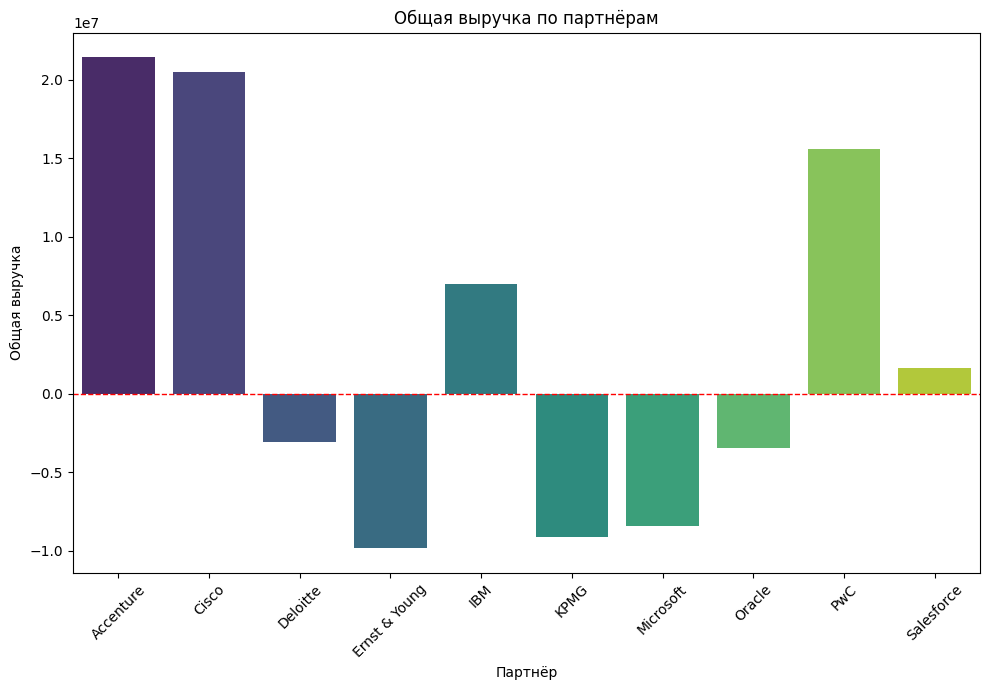

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

revenue_data = df_final_cleaned.groupby('partner')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(data=revenue_data, x='partner', y='revenue', palette='viridis')
plt.title('Общая выручка по партнёрам')
plt.xlabel('Партнёр')
plt.ylabel('Общая выручка')
plt.xticks(rotation=45)

plt.axhline(0, color='red', linewidth=1, linestyle='--')

plt.tight_layout()
plt.show()


In [69]:
df_final_cleaned.to_csv('consolidated_revenue_data.csv', index=False)

In [70]:
from google.colab import files
files.download('consolidated_revenue_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>